# An√°lise Explorat√≥ria e Preditiva: 
# Pre√ßo de Casas - Explora√ß√£o e T√©cnicas de Regress√£o Avan√ßadas | Kaggle

***

#### An√°lise realizada por ***Vin√≠cius Nunes Rebeque*** em Agosto/2022 
#### Visite meu LinkedIn: https://www.linkedin.com/in/vrebeque/ 
#### Explore meu GitHub: https://github.com/Rebeque 
***

Fonte dos dados: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

[Clique aqui](#start) para descer diretamente para a an√°lise explorat√≥ria dos dados;

Ou [clique aqui](#ml) para ir at√© a se√ß√£o de Machine Learning;

J√° [esse bot√£o](#upgrade) te leva at√© o aprimoramento do modelo entre os testados.


***
#### 1. INTRODU√á√ÉO:

Esse dataset foi **desenvolvido por Dean De Cock** com o objetivo de **educar aprendizes** em **An√°lise de Dados** e **Aprendizado de M√°quina**. Ele √© um conjunto de **dados p√∫blicos** hospedado na Kaggle.com (plataforma de aprendizado de dados).

Os dados observados s√£o registros de vendas de casas de 4 anos. Entre 2006 e 2010.

Voc√™ tem alguma informa√ß√£o sobre como s√£o determinados os valores de casas √† venda? A an√°lise desse conjunto de dados tem por **objetivo desmistificar como s√£o determinados os pre√ßos de im√≥veis** durante a avalia√ß√£o de um especialista e **quanto cada vari√°vel afeta o valor do bem**.

Por intui√ß√£o provavelmente sua resposta ser√° relacionada com o **n√∫mero de quartos, tamanho do terreno, √°rea constru√≠da, se tem ou n√£o garagem e atributos como esse**. Al√©m desses atributos o conjunto de dados traz muitas outras informa√ß√µes que **podem OU N√ÉO influenciar** de maneira relevante no pre√ßo do im√≥vel. 

Meu objetivo como analista nesse caso √© entender **quais as vari√°veis s√£o mais relevantes** e quais delas gera **previs√µes mais assertivas** no pre√ßo final do bem.

***
#### 2. OBJETIVOS:
- Trabalhar com engenharia de vari√°veis (feature engineering);
- Praticar plotagem usando o Seaborn;
- Aprimorar a verifica√ß√£o de hip√≥teses;
- Utilizar t√©cnicas de regress√£o avan√ßadas como random forest e seus par√¢metros.

***
#### 3. DESENVOLVIMENTO: <a id="start"> </a>

In [1]:
# Instala√ß√£o da Kaggle API para extra√ß√£o do conjunto de dados 

#!pip install kaggle --quiet   
#!pip install opendatasets --quiet

# A flag quiet serve para evitar polui√ß√£o no notebook

In [2]:
# Importa√ß√£o e alias das bibliotecas Python necess√°rias

import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
import zipfile

In [3]:
# Instala a Kaggle API no Anaconda3 j√° que √© a primeira vez que utilizamos essa API

#!conda install -c conda-forge kaggle  

# Foi necess√°rio criar um token .json no meu perfil do Kaggle para poder utilizar os dados p√∫blicos.

# Esse arquivo foi inserido na pasta do usu√°rio/.kaggle 

In [4]:
# Carrega os dados por meio da Kaggle API
#!kaggle competitions download -c house-prices-advanced-regression-techniques

In [5]:
# Descompacta o arquivo baixado pela Kaggle API usando o pacote ZipFile

with zipfile.ZipFile('D:\DSA - Data Science Academy\Kaggle Competitions\House Prices - Advanced Regression Techniques\house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('D:\DSA - Data Science Academy\Kaggle Competitions\House Prices - Advanced Regression Techniques\dataset')

In [111]:
# Carrega o Dataset utilizando o pacote Pandas no alias 'df'
df = pd.read_csv('dataset\HousePrices_train.csv')

# Exibe as primeiras observa√ß√µes do df
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
# Lista todas as features do dataset (colunas)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### A lista abaixo descreve de maneira resumida cada uma das features.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


#### Para vari√°veis de nota essa √© a classifica√ß√£o:

- 10	Very Excellent
- 9	Excellent
- 8	Very Good
- 7	Good
- 6	Above Average
- 5	Average
- 4	Below Average
- 3	Fair
- 2	Poor
- 1	Very Poor

In [8]:
# Imprime um sum√°rio anal√≠tico com os dados 
pd.options.display.max_columns = df.shape[1] # Exibir todas as colunas
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
# Escolhendo arbitrariamente algumas features para analisar o sum√°rio
df[['LotArea',
          'Street',
          'OverallQual',
          'OverallCond',
          'YearBuilt', 
          'YearRemodAdd',
          'BedroomAbvGr', 
          'SalePrice',
          'GarageCars']].describe(include='all')

# O primeiro erro que encontrei no df escrevendo essa c√©lula foi:
# Na descri√ß√£o do df havia uma coluna chamada 'Bedroom' quando na verdade seu nome real no arquivo √© 'BedroomAbvGr'

LotArea Street  OverallQual  OverallCond    YearBuilt  \
count     1460.000000   1460  1460.000000  1460.000000  1460.000000   
unique            NaN      2          NaN          NaN          NaN   
top               NaN   Pave          NaN          NaN          NaN   
freq              NaN   1454          NaN          NaN          NaN   
mean     10516.828082    NaN     6.099315     5.575342  1971.267808   
std       9981.264932    NaN     1.382997     1.112799    30.202904   
min       1300.000000    NaN     1.000000     1.000000  1872.000000   
25%       7553.500000    NaN     5.000000     5.000000  1954.000000   
50%       9478.500000    NaN     6.000000     5.000000  1973.000000   
75%      11601.500000    NaN     7.000000     6.000000  2000.000000   
max     215245.000000    NaN    10.000000     9.000000  2010.000000   

        YearRemodAdd  BedroomAbvGr      SalePrice   GarageCars  
count    1460.000000   1460.000000    1460.000000  1460.000000  
unique           NaN           NaN            NaN          NaN  
top              NaN           NaN            NaN          NaN  
freq             NaN           NaN            NaN          NaN  
mean     1984.865753      2.866438  180921.195890     1.767123  
std        20.645407      0.815778   79442.502883     0.747315  
min      1950.000000      0.000000   34900.000000     0.000000  
25%      1967.000000      2.000000  129975.000000     1.000000  
50%      1994.000000      3.000000  163000.000000     2.000000  
75%      2004.000000      3.000000  214000.000000     2.000000  
max      2010.000000      8.000000  755000.000000     4.000000

***
#### Analisando o sum√°rio:

Os valores 'NaN' significam que o m√©todo n√£o se aplica para aquela observa√ß√£o. Essa sigla pode significar 'N√£o √© um n√∫mero' ou 'Valor ausente'. Nesse caso se aplica a primeira defini√ß√£o.

- A feature 'LotArea' que representa o tamanho do lote da casa tem como m√©dia o tamanho de 10.516m¬≤;


- Apenas seis das 1460 casas registradas n√£o possuem rua pavimentada e apenas uma casa teve a nota da rua ranqueada como 'Poor'(2). Feature 'Street'.


- A qualidade do material e acabamento das casas registradas tem m√©dia 6 ('Above Average') desviando em m√©dia 1.4 pontos entre elas. No df existem casas com qualidade de 1 a 10 (m√≠n., m√°x.). Feature 'OverallQual'.


- J√° a qualidade no geral das casas tem m√©dia 5.57. O desvio padr√£o √© de 1.11 pontos. A nota m√°xima registrada foi 9 ('Excelent'). Feature 'OverallCond'.


- As casas registradas foram construidas em m√©dia no ano de 1971. Desviando entre elas 30 anos. A casa mais antiga √© de 1872! J√° a mais nova √© de 2010. Lembrando que o df compreende casas vendidas entre 2006 e 2010. Feature 'YearBuilt'.


- Apesar de termos registros de casas muito antigas a coluna 'YearRemodAdd' nos mostra que a reforma mais antiga foi em 1950. Em  m√©dia as casas foram reformadas em 1984. Essa vari√°vel n√£o √© muito palp√°vel j√° que casas mais novas n√£o tem motivo para serem reformadas. Feature 'YearRemodAdd'.


- A coluna 'BedroomAbvGr' me deixou em d√∫vida. O nome anterior fazia mais sentido j√° que compreendia quartos no geral, j√° essa nova descri√ß√£o compreende apenas quartos no primeiro andar. Ser√° que se haviam quartos no t√©rreo eles foram computados? Essa √© uma pergunta que eu faria para o respons√°vel pelos dados. De qualquer forma vamos analis√°-la: 
A m√©dia de quartos √© de 2.86. Pelo desvio de 0.86 temos que a maioria das casas varia entre 3 e 2 quartos. Temos alguns registros de casas sem quartos (ou ser√° que sem quartos no primeiro andar???). E temos um registro com uma casa com 8 quartos!


- A feature 'GarageCars' nos conta quantos carros cabem na garagem de cada registro. Em m√©dia cabem 1.77 carros em cada garagem da casa. O desvio padr√£o √© de 0.74. Existem casas que n√£o cabem carro algum na garagem e casas onde cabem 4 carros.


- A m√©dia de pre√ßo das casas registradas √© de 180.921 USD com um desvio padr√£o de aproximadamente 80 mil USD. A casa mais barata registrada foi vendida por 34.900 USD. J√° a mais cara por incr√≠veis 755.000 USD.


- No geral o df parece bem diversificado. Cont√©m informa√ß√µes de diferentes tipos de casa. Por enquanto n√£o foi poss√≠vel identificar nenhuma tend√™ncia para casas maiores ou menores, por exemplo.

#### Verificando rela√ß√µes entre as vari√°veis escolhidas arbitrariamente para compreender melhor nosso df:

In [10]:
# Verificando se na m√©dia existe rela√ß√£o entre o valor de venda e o ano de constru√ß√£o.
df.groupby('SalePrice')['YearBuilt'].mean()

SalePrice
34900     1920.0
35311     1949.0
37900     1910.0
39300     1946.0
40000     1920.0
           ...  
582933    2008.0
611657    2009.0
625000    1995.0
745000    1996.0
755000    1994.0
Name: YearBuilt, Length: 663, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

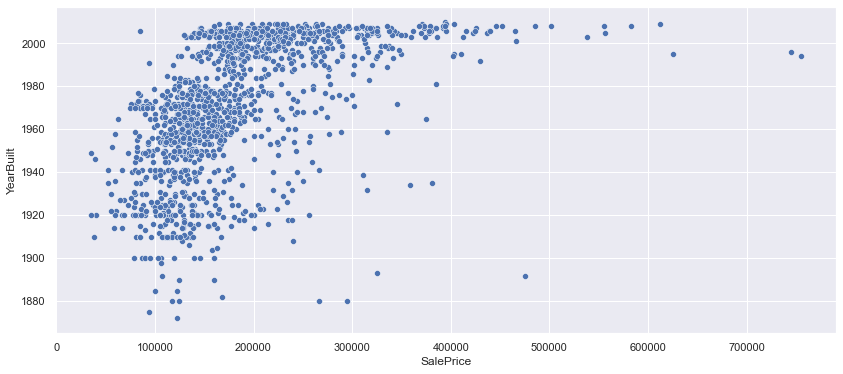

In [11]:
sns.scatterplot(x='SalePrice', y='YearBuilt', data=df)

Esse ScatterPlot nos mostra que existem alguns outliers no pre√ßo m√°ximo das casas vendidas. 

Considerando apenas essas duas vari√°veis n√£o √© poss√≠vel afirmar que existe uma correla√ß√£o clara entre o valor da venda e o ano de constru√ß√£o j√° que tanto nos valores mais baixos quanto nos valores medianos existem vendas de casas novas e antigas.

Esse fato pode ser dado pelas reformas realizadas ent√£o vamos dar uma olhada no valor das vendas pelo ano de reforma.

Mas primeiro vamos verificar o percentual de casas que receberam reformas.

In [12]:
missing = pd.isnull(df['YearRemodAdd'])
df[missing]

# Aparentemente n√£o h√° valores ausentes nessa feature. Logo 100% das casas foram reformadas em algum momento

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [13]:
df.groupby('YearRemodAdd')['SalePrice'].mean()

YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
            ...      
2006    229471.134021
2007    224807.250000
2008    269709.100000
2009    284085.391304
2010    336963.500000
Name: SalePrice, Length: 61, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='YearRemodAdd'>

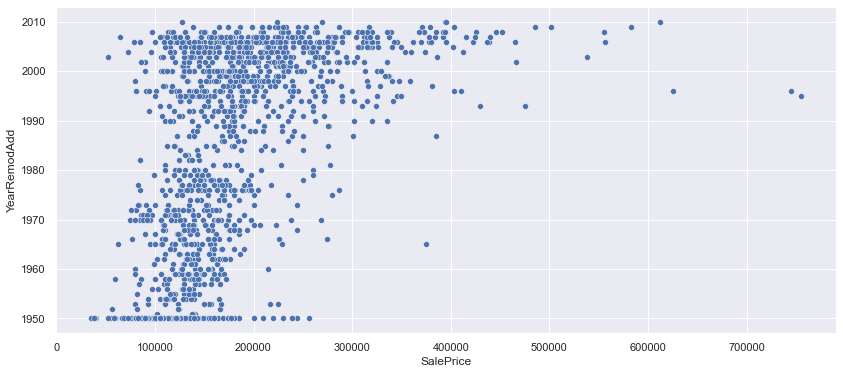

In [14]:
sns.scatterplot(x='SalePrice', y='YearRemodAdd', data=df)

Essa plotagem se mostrou bastante semelhante √† anterior. Aparentemente tamb√©m n√£o h√° uma clara e decisiva rela√ß√£o entre o ano da reforma realizada com o pre√ßo final da casa. At√© porque como vimos 100% das casas foram reformadas em algum momento, o que indica que 100% dos vendedores de casas nesse estudo se atentaram √† esse ponto de precifica√ß√£o. 

Ainda falando de pre√ßo podemos analisar a feature 'YrSold' que nos diz o ano em que essa casa foi vendida. Com essa coluna podemos verificar se houve uma valoriza√ß√£o evidente no pre√ßo das casas em m√©dia no per√≠odo do estudo (2006-2010).

In [15]:
df.groupby('YrSold')['SalePrice'].mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

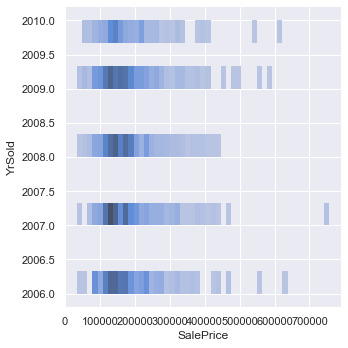

In [16]:
sns.displot(x='SalePrice', y='YrSold', data=df)

Por meio desse displot podemos verificar que os valores n√£o sofreram grandes varia√ß√µes considerando esse per√≠odo. Fato que se fosse comparado com nossa d√©cada seria bastante diferente por conta da COVID e outros fatores pol√≠ticos mundiais. Se tivessemos dados do Brasil nessa √∫ltima d√©cada eu suponho que teriamos grandes varia√ß√µes para mais entre 2012-2022.

√â poss√≠vel afirmar que n√£o houve nenhuma cat√°strofe no mercado imobili√°rio e na economia do pa√≠s durante esse per√≠odo? Acredito que sim.

***
### MATRIZ DE CORRELA√á√ÉO:

Agora vou parar de pesquisar aleatoriamente hip√≥teses por curiosidade e vou criar uma **matriz de correla√ß√£o** com o intuito de encontrar as caracter√≠sticas que tem mais rela√ß√£o entre si na defini√ß√£o do pre√ßo das casas vendidas.

In [17]:
# Essa √© a matriz de correla√ß√£o bruta usando o m√©todo Pearson (correla√ß√£o linear) que √© o padr√£o
# No m√©todo Pearson quanto mais pr√≥ximo de 1 entre duas colunas (excluindo a si mesma) maior √© a correla√ß√£o entre elas
# Vou guardar o resultado em um objeto para acess√°-lo mais tarde

corr = df.corr()
corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

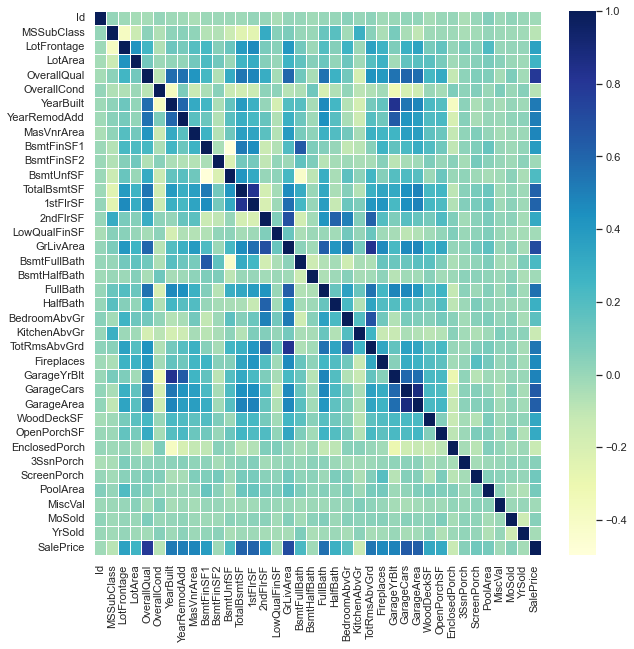

In [18]:
# O nosso foco est√° na coluna SalePrice (a √∫ltima linha da matriz bruta)
# Para facilitar a visualiza√ß√£o vamos criar um mapa de calor e verificar onde os valores est√£o mais pr√≥ximos de 1 para SalePrice
# Na escala quanto mais Azul Escuro mais pr√≥ximo de 1

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=False, linewidths=.5, cmap='YlGnBu')

##### Dados num√©ricos de correla√ß√£o com SalePrice:
    
- OverallQual: 0.790982 - Qualidade geral do material e acabamento da casa
- TotalBsmtSF: 0.613581 - Tamanho total da √°rea construida (do fundamento da casa)
- 1stFlrSF: 0.605852 - Metros quadrados do primeiro andar
- GrLivArea: 0.708624 - Tamanho total da √°rea de estar
- GarageCars: 0.640409 - N√∫mero de carros que a garagem suporta
- GarageArea: 0.623431 - Tamanho da garagem

Essas foram as correla√ß√µes mais altas entre todo o df. Mas e na pr√°tica, elas fazem sentido? Aparentemente sim porque tem valor quando pensamos nas nossas experi√™ncias. Talvez tiv√©ssemos a hip√≥tese de que outras vari√°veis fossem mais importantes como o n√∫mero de quartos, por exemplo.

S√≥ que o n√∫mero de quartos performou apenas 0.168213. Interessante, n√£o?


##### Agora vamos plotar os gr√°ficos baseando-se nos n√∫meros de maior correla√ß√£o que n√≥s j√° temos. Ao inv√©s de seguirmos nossa intui√ß√£o.

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

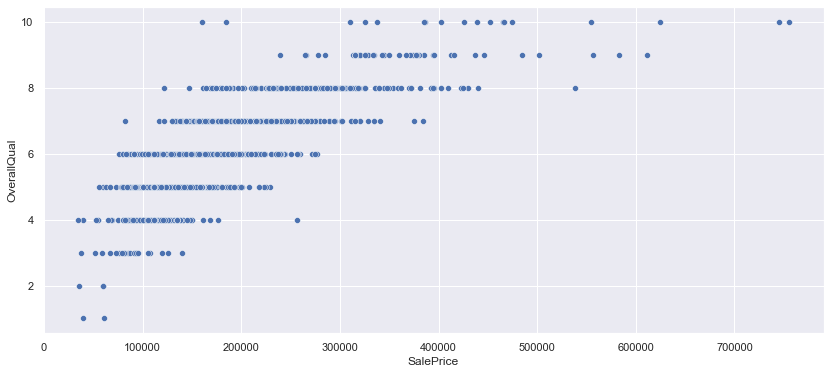

In [19]:
sns.scatterplot(x='SalePrice', y='OverallQual', data=df)

# Claramente uma rela√ß√£o de ascen√ß√£o do pre√ßo com a qualidade dos materiais e acabamentos. 
# Existem outliers com pre√ßos baixos e √≥timo indicador, por√©m, s√£o excess√µes.

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

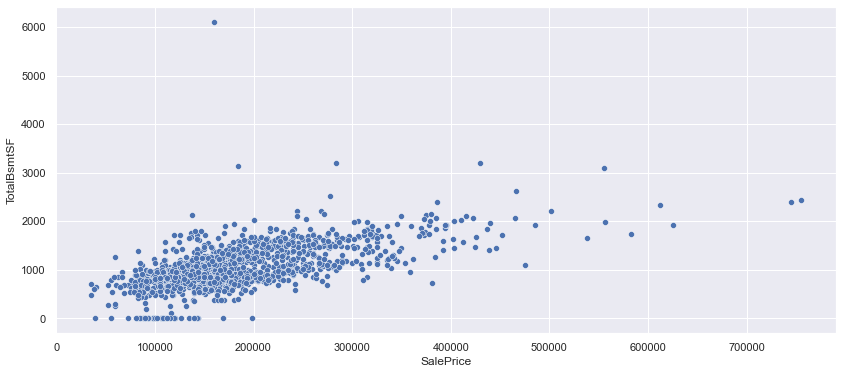

In [20]:
sns.scatterplot(x='SalePrice', y='TotalBsmtSF', data=df)

# Outra clara rela√ß√£o. Aparentemente o m√©todo de correla√ß√£o estava certo.

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

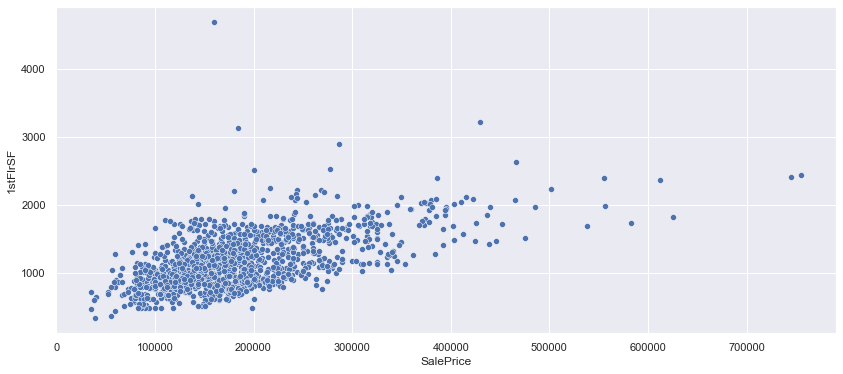

In [21]:
sns.scatterplot(x='SalePrice', y='1stFlrSF', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

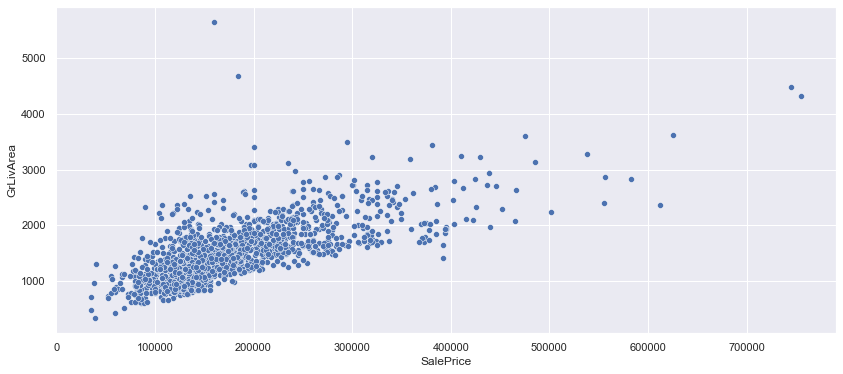

In [22]:
sns.scatterplot(x='SalePrice', y='GrLivArea', data=df)

# Repare como todas as plotagens est√£o fazendo muito mais sentido agora que estamos analisando as features certas.

<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>

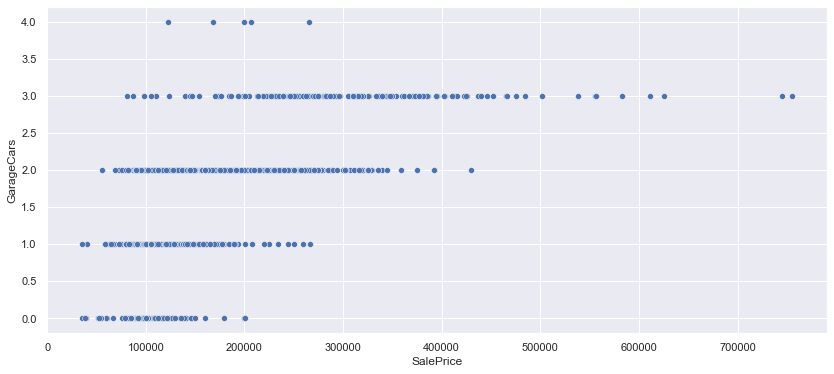

In [23]:
sns.scatterplot(x='SalePrice', y='GarageCars', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

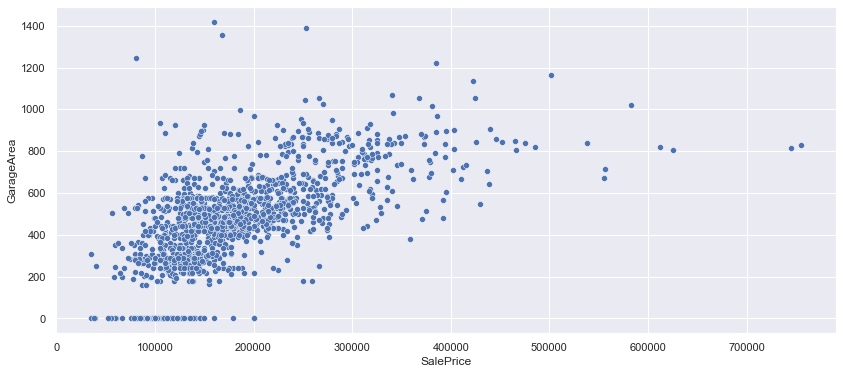

In [24]:
sns.scatterplot(x='SalePrice', y='GarageArea', data=df)

***
### Hora de criar nosso modelo de aprendizado de m√°quina usando as correla√ß√µes encontradas <a id="ml"> </a>

O pr√≥ximo de passo √© fazer um backup do nosso DF completo atual e atualiz√°-lo apenas para as features que j√° vimos ter mais relev√¢ncia. 

Caso futuramente quisermos trocar essas features basta reestabelecer o backup como principal ou usar a nova nomenclatura.

In [118]:
# Backup
df_backup1 = df

# Feature arrange
df = df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]

In [119]:
# Agora vou verificar se entre as colunas que restaram temos dados ausentes ou inv√°lidos.

if df.isnull().any() is True:
    print('Temos valores ausentes')
    
else:
    print('Estamos prontos para ir ;-)')

Estamos prontos para ir ;-)


In [120]:
# Vamos definir a nossa coluna alvo do modelo de predi√ß√£o. Por conven√ß√£o o objeto deve ser chamar y.

y = df_backup1.SalePrice

# No X (mai√∫sculo) ficam nossos dados

X = df

# Agora uma verifica√ß√£o r√°pida estat√≠stica e de visualiza√ß√£o

print(X.columns)
print('\n----\n')
print(y)
print('\n----')
X.describe()

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea'],
      dtype='object')

----

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

----


OverallQual  TotalBsmtSF     1stFlrSF    GrLivArea   GarageCars  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.099315  1057.429452  1162.626712  1515.463699     1.767123   
std       1.382997   438.705324   386.587738   525.480383     0.747315   
min       1.000000     0.000000   334.000000   334.000000     0.000000   
25%       5.000000   795.750000   882.000000  1129.500000     1.000000   
50%       6.000000   991.500000  1087.000000  1464.000000     2.000000   
75%       7.000000  1298.250000  1391.250000  1776.750000     2.000000   
max      10.000000  6110.000000  4692.000000  5642.000000     4.000000   

        GarageArea  
count  1460.000000  
mean    472.980137  
std     213.804841  
min       0.000000  
25%     334.500000  
50%     480.000000  
75%     576.000000  
max    1418.000000

In [28]:
X.head()

OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  GarageArea
0            7          856       856       1710           2         548
1            6         1262      1262       1262           2         460
2            7          920       920       1786           2         608
3            7          756       961       1717           3         642
4            8         1145      1145       2198           3         836

#### Aparentemente tudo certo. Seguimos em frente para a cria√ß√£o do modelo.

##### Seguiremos a proposta da Kaggle:

* Defina - Que tipo de modelo ser√° usado?<br>
_R: No nosso caso ser√° uma regress√£o linear j√° que temos uma target de pre√ßo_
* Fit - Vamos capturar a "forma" que os dados interagem entre si.
* Predi√ß√£o - Prever usando inputs novos para o nosso modelo.
* Valida√ß√£o - Vamos quantificar qu√£o preciso nosso modelo √©.

##### Nosso modelo se encaixa com uma regress√£o linear e a vers√£o 1 vai ser produzida com o DecisionTreeRegressor do SKLearn.

***
### Modelo v1 = DecisionTreeRegressor

In [29]:
# Importando a livraria
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Dividindo dados em treino e teste para valida√ß√£o
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Definindo e enumerando nosso modelo
modelo_v1 = DecisionTreeRegressor(random_state=1) # Random_state apenas para fins did√°ticos e futuros testes

# Treinando o modelo (fit)
modelo_v1.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

26691.86301369863
O erro m√©dio absoluto do modelo v1 (DecisionTreeRegressor) √© de: 26691.86 USD em uma predi√ß√£o.


C:\Users\vinic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Res√≠duos')

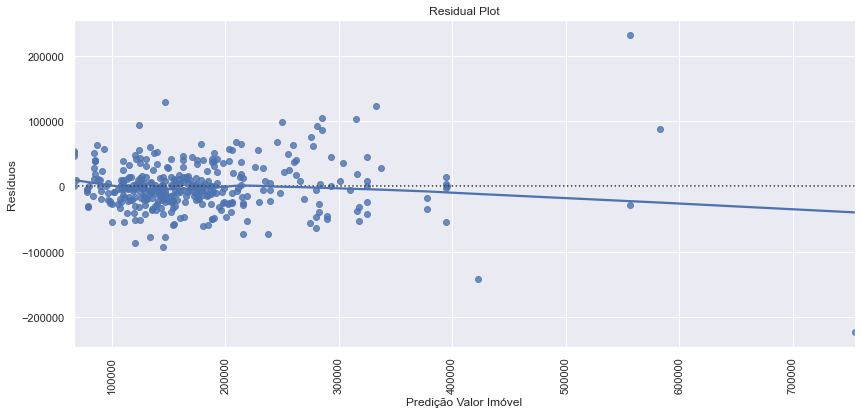

In [30]:
# Hora de fazer as primeiras predi√ß√µes e valida√ß√µes
# Importando a biblioteca de verifica√ß√£o de m√©dia de erros absoluta (MAE)
from sklearn.metrics import mean_absolute_error

# Vamos prever usando os dados de valida√ß√£o (o modelo n√£o foi treinado com eles - logo ele n√£o conhece esses dados)
modelo_v1_preds = modelo_v1.predict(val_X)

# O retorno do algor√≠tmo √© uma lista de n√∫meros para cada entrada. Cada n√∫mero na lista √© uma predi√ß√£o para os valores validados.

# Verificando a acur√°cia do nosso modelo
modelo_v1_mae = mean_absolute_error(val_y, modelo_v1_preds)
print(modelo_v1_mae)
print('O erro m√©dio absoluto do modelo v1 (DecisionTreeRegressor) √© de: %.2f USD em uma predi√ß√£o.' %(modelo_v1_mae))

# Plotando uma visualiza√ß√£o de uniformidade das predi√ß√µes com um gr√°fico de res√≠duos
modelo_v1_plot = sns.residplot(modelo_v1_preds, val_y - modelo_v1_preds, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predi√ß√£o Valor Im√≥vel')
plt.xticks(rotation=90)
plt.ylabel('Res√≠duos')

#### Em um gr√°fico residual quanto mais longe os pontos do nosso eixo X da marca zero no eixo Y (que seria a previs√£o perfeita) maior o erro para cada previs√£o calculada.

#### Nota-se que o gr√°fico condiz com o erro m√©dio absoluto calculado. Boa parte das medi√ß√µes est√° com uma dist√¢ncia grande do ponto zero - cerca de 20.000 se considerar para mais e para menos no eixo Y.

#### O valor gerado pela nossa predi√ß√£o comparado ao MAE nos mostra o qu√£o a predi√ß√£o √© precisa ou n√£o e pode ser usado como um score para analisarmos diferentes modelos de regress√£o.

#### Como esse modelo √© um DecisionTree n√≥s podemos aplicar uma fun√ß√£o atrelada a um par√¢metro que determina a profundidade de divis√µes antes do modelo entregar a predi√ß√£o.

In [31]:
def calcular_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    modelo_v1 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    modelo_v1.fit(train_X, train_y)
    modelo_v1_preds = modelo_v1.predict(val_X)
    modelo_v1_mae = mean_absolute_error(val_y, modelo_v1_preds)
    return(modelo_v1_mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    range_mae = calcular_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Erro M√©dio Absoluto:  %d" %(max_leaf_nodes, range_mae))
    
print('\nAparentemente a melhor profundidade √© de 50 leaf nodes.')

Max leaf nodes: 5  		 Erro M√©dio Absoluto:  31248
Max leaf nodes: 50  		 Erro M√©dio Absoluto:  22563
Max leaf nodes: 500  		 Erro M√©dio Absoluto:  25835
Max leaf nodes: 5000  		 Erro M√©dio Absoluto:  26298

Aparentemente a melhor profundidade √© de 50 leaf nodes.


#### Score atual MAE:
- Modelo v1 (DecisionTreeRegressor com 50 leaf nodes): 22563 USD 

#### Agora vou testar diferentes modelos de regress√£o dispon√≠veis na biblioteca SKLearn a verificar qual o mais efetivo para o nosso problema.

***
### Modelo v2 = RandomForestRegressor

20725.15861045043
O erro m√©dio absoluto do modelo v2 (RandomForestRegressor) √© de: 20725.16 USD em uma predi√ß√£o.


C:\Users\vinic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Res√≠duos')

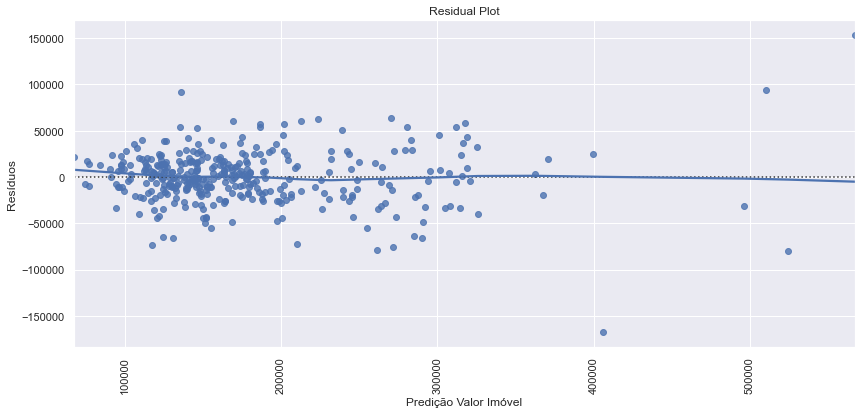

In [32]:
# Importando a biblioteca
from sklearn.ensemble import RandomForestRegressor

# Criando a vers√£o 2 do modelo
modelo_v2 = RandomForestRegressor(random_state=1)

# Treinando modelo v2
modelo_v2.fit(train_X, train_y)

# Valida√ß√£o do modelo v2
modelo_v2_preds = modelo_v2.predict(val_X)

modelo_v2_mae = mean_absolute_error(val_y, modelo_v2_preds)
print(modelo_v2_mae)
print('O erro m√©dio absoluto do modelo v2 (RandomForestRegressor) √© de: %.2f USD em uma predi√ß√£o.' %(modelo_v2_mae))

# Plotando uma visualiza√ß√£o de uniformidade das predi√ß√µes com um gr√°fico de res√≠duos
modelo_v2_plot = sns.residplot(modelo_v2_preds, val_y - modelo_v2_preds, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predi√ß√£o Valor Im√≥vel')
plt.xticks(rotation=90)
plt.ylabel('Res√≠duos')

#### O RandomForest tamb√©m nos permite aplicar a fun√ß√£o de verifica√ß√£o MAE em v√°rios nodes.

In [33]:
def calcular_maev2(max_leaf_nodes, train_X, val_X, train_y, val_y):
    modelo_v2 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    modelo_v2.fit(train_X, train_y)
    modelo_v2_preds = modelo_v2.predict(val_X)
    modelo_v2_mae = mean_absolute_error(val_y, modelo_v2_preds)
    return(modelo_v2_mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    range_maev2 = calcular_maev2(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Erro M√©dio Absoluto:  %d" %(max_leaf_nodes, range_maev2))

Max leaf nodes: 5  		 Erro M√©dio Absoluto:  28392
Max leaf nodes: 50  		 Erro M√©dio Absoluto:  20168
Max leaf nodes: 500  		 Erro M√©dio Absoluto:  20483
Max leaf nodes: 5000  		 Erro M√©dio Absoluto:  20482


#### Score atual MAE:
- Modelo v1 (DecisionTreeRegressor com 50 leaf nodes): 22563 USD 
- Modelo v2 (RandomForestRegressor com 50 leaf nodes): 20168 USD üëàüèªüëë

***
### Modelo v3 = LinearRegression

24349.94809946371
O erro m√©dio absoluto do modelo v3 (LinearRegression) √© de: 24349.95 USD em uma predi√ß√£o.


C:\Users\vinic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Res√≠duos')

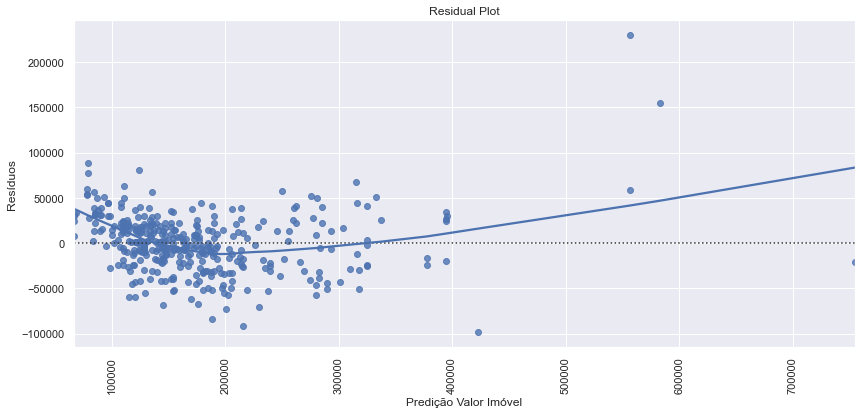

In [34]:
# Importando a biblioteca
from sklearn.linear_model import LinearRegression

# Criando a vers√£o 3 do modelo
modelo_v3 = LinearRegression()

# Treinando modelo v3
modelo_v3.fit(train_X, train_y)

# Valida√ß√£o do modelo v3
modelo_v3_preds = modelo_v3.predict(val_X)

modelo_v3_mae = mean_absolute_error(val_y, modelo_v3_preds)
print(modelo_v3_mae)
print('O erro m√©dio absoluto do modelo v3 (LinearRegression) √© de: %.2f USD em uma predi√ß√£o.' %(modelo_v3_mae))

# Plotando uma visualiza√ß√£o de uniformidade das predi√ß√µes com um gr√°fico de res√≠duos
modelo_v3_plot = sns.residplot(modelo_v1_preds, val_y - modelo_v3_preds, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predi√ß√£o Valor Im√≥vel')
plt.xticks(rotation=90)
plt.ylabel('Res√≠duos')

#### Score atual MAE:
- Modelo v1 (DecisionTreeRegressor com 50 leaf nodes): 22563 USD 
- Modelo v2 (RandomForestRegressor com 50 leaf nodes): 20168 USD üëàüèªüëë
- Modelo v3 (LinearRegression): 24350 USD 

### Ser√° que podemos melhorar o modelo v2 RandomForest? 
### Al√©m de definir sua profundidade, o que mais podemos fazer? <a id="upgrade"> </a>
***
#### Vou come√ßar gerando uma visualiza√ß√£o de curva de aprendizado para saber como ele assimilou os resultados. Ser√° que se tiv√©ssemos mais observa√ß√µes nosso modelo seria mais preciso?

In [44]:
# Definindo os pontos de leitura do eixo X.
print(X.shape, 'Temos 1460 observa√ß√µes de dados separados nas 6 features.')
train_sizes = [range(1, 1168)]

(1460, 6) Temos 1460 observa√ß√µes de dados separados nas 6 features.


(0.0, 1200.0)

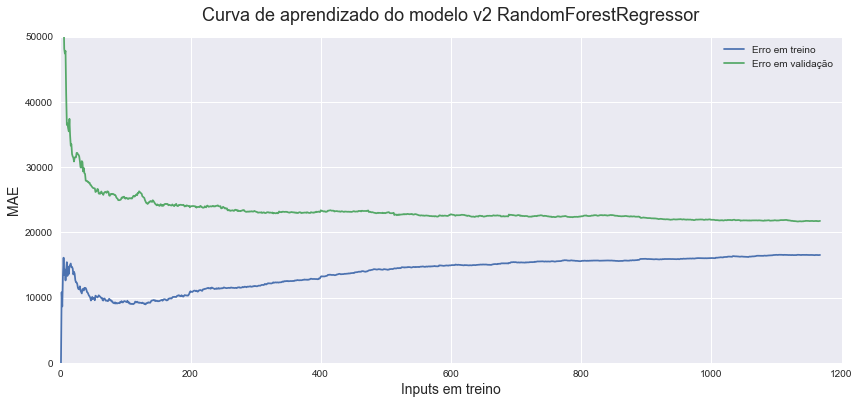

In [45]:
# Importando a biblioteca Learning Curve
from sklearn.model_selection import learning_curve

# Criando os objetos para os par√¢metros
features = X
target = y

# Definindo os par√¢metros
# No modelo vamos implementar o valor ideal de leaf nodes
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(max_leaf_nodes=50, random_state=1),
X = features,
y = target, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_absolute_error') # Vamos usar o mesmo sistema de score - o MAE

# Essa biblioteca nos retorna diversos scores num√©ricos dentro das "√©pocas" que escolhemos no primeiro objeto. 
# Vou printar apenas o gr√°fico diretamente.

# Gerando as m√©dias para plotagem.
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

# Plotagem.
plt.style.use('seaborn')
plt.figure(figsize=(14,6))
plt.plot(train_sizes, train_scores_mean, label = 'Erro em treino')
plt.plot(train_sizes, validation_scores_mean, label = 'Erro em valida√ß√£o')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Inputs em treino', fontsize = 14)
plt.title('Curva de aprendizado do modelo v2 RandomForestRegressor', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,50000)
plt.xlim(0, 1200)

Verifique como o modelo erra cada vez menos conforme se aproxima do m√°ximo de dados dispon√≠veis. Algumas constata√ß√µes:

- Com mais dados ter√≠amos uma melhor precis√£o no modelo. Existe um ponto irredut√≠vel de erro que √© quando o modelo passa a piorar depois de certa quantidade de dados informados. N√£o √© nosso caso j√° que as linhas ainda n√£o se expeliram com a quantidade dispon√≠vel.

- Nosso modelo n√£o est√° tendencioso (bias) j√° que nosso erro em treino n√£o est√° alto de mais.

- H√° pouca varia√ß√£o de erro nas predi√ß√µes conforme a quantidade de dados vai aumentando. Temos uma melhora expressiva ap√≥s os 1000 inputs.

Bom, n√£o temos mais dados para implementar j√° que esse dataset √© est√°tico e j√° usamos tudo dispon√≠vel.
O que mais pode ser feito?
***
### Vamos explorar os hyperpar√¢metros do m√©todo RandomForest.

In [46]:
# Vamos recome√ßar assim:

modelo_v2 = RandomForestRegressor(max_leaf_nodes=50, random_state=0)
modelo_v2.fit(train_X, train_y)

print('Score em treino: %.3f' %(modelo_v2.score(train_X, train_y)))
print('Score em valida√ß√£o: %.3f' %(modelo_v2.score(val_X, val_y)))
print('O objetivo √© se aproximar o m√°ximo poss√≠vel dos valores encontrados em treino.')

Score em treino: 0.912
Score em valida√ß√£o: 0.885
O objetivo √© se aproximar o m√°ximo poss√≠vel dos valores encontrados em treino.


In [47]:
# Par√¢metros atuais do nosso RandomForest modelo v2
from pprint import pprint


print('Par√¢metros em uso:\n')
pprint(modelo_v2.get_params())

Par√¢metros em uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [48]:
# Inicializa√ß√£o dos par√¢metros para encontrarmos o melhor ambiente poss√≠vel.
# Repare que vou tentar melhorar os leaf_nodes que j√° sabemos que est√° perto de 50.

parameters={"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Calculando diferentes m√©tricas de regress√£o de uma s√≥ vez usando os par√¢metros e a biblioteca GridSearch.

from sklearn.model_selection import GridSearchCV

#modelov2_tunado=GridSearchCV(modelo_v2,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3,verbose=3)

# Fun√ß√£o para verificar quanto tempo levou essa varredura pelos par√¢metros.

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [56]:
#%%capture
#from datetime import datetime

#start_time=timer(None)

#modelov2_tunado.fit(X,y)

#timer(start_time)

# Resultado
#print(modelov2_tunado.best_params_)


max_depth=7,max_features=log2,max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1


In [57]:
#print(modelov2_tunado.best_params_)
print('max_depth=7,max_features=log2,max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1')

max_depth=7,max_features=log2,max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1


In [58]:
# Implementando as melhorias no m√©todo

modelov2_tunado = RandomForestRegressor(max_depth=7,
                                         max_features='log2',
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.1)
# Treinando o modelo
modelov2_tunado.fit(train_X, train_y)

# Valida√ß√£o do modelov2_tunado
modelov2_tunado_preds = modelov2_tunado.predict(val_X)

modelov2_tunado_mae = mean_absolute_error(val_y, modelov2_tunado_preds)
print(modelov2_tunado_mae)
print('O erro m√©dio absoluto do modelov2_tunado (RandomForestRegressor) √© de: %.2f USD em uma predi√ß√£o.' %(modelov2_tunado_mae))

26964.796180033154
O erro m√©dio absoluto do modelov2_tunado (RandomForestRegressor) √© de: 26964.80 USD em uma predi√ß√£o.


In [59]:
# Score obtido com os par√¢metros "otimizados"

print('Score com hyperparametros: %.3f' %(modelov2_tunado.score(X, y)))
print('Score em treino: %.3f' %(modelo_v2.score(train_X, train_y)))
print('Score em valida√ß√£o: %.3f' %(modelo_v2.score(val_X, val_y)))

Score com hyperparametros: 0.710
Score em treino: 0.912
Score em valida√ß√£o: 0.885


C:\Users\vinic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Res√≠duos')

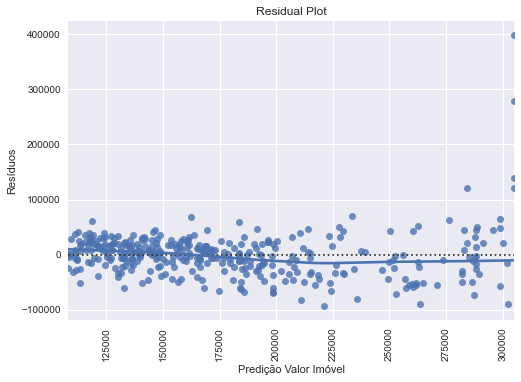

In [60]:
# Plotando uma visualiza√ß√£o de uniformidade das predi√ß√µes com um gr√°fico de res√≠duos
modelov2_tunado_plot = sns.residplot(modelov2_tunado_preds, val_y - modelov2_tunado_preds, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predi√ß√£o Valor Im√≥vel')
plt.xticks(rotation=90)
plt.ylabel('Res√≠duos')

Acredito que essa seja a pior vers√£o do nosso modelo at√© agora. Por mais que n√≥s tenhamos usado os par√¢metros para otimizar o modelo, com os nossos pr√≥prios par√¢metros padr√£o o modelo se saiu melhor.

Com os resultados obtidos vou gerar uma submission na competi√ß√£o do Kaggle, para isso vou submeter o modelo a um dataset novo de teste. 

O modelo ainda n√£o conhece esses dados. Com base no resultado da predi√ß√£o desse dataset a Kaggle vai analisar a performance do meu modelo em compara√ß√£o com outros competidores.

***
#### 4. PROVA REAL E SUBMISS√ÉO AO KAGGLE

In [195]:
# Pr√© Processamento e backup para a pr√≥xima c√©lula
X_backup = X
y_backup = y

In [220]:
# Prepara ambiente
import os
if not os.path.exists('dataset\HousePrices_train.csv'):
    os.symlink('dataset\HousePrices_train.csv', 'dataset\HousePrices_train.csv')  
    os.symlink('test.csv', 'test.csv') 
    

# Define o modelo com as melhores configura√ß√µes encontradas
modelo_final = RandomForestRegressor(max_leaf_nodes=50, random_state=0)

# Treina o modelo em TODO o dataset - n√£o s√≥ treino e valida√ß√£o como anteriormente
modelo_final.fit(X, y)

# Importa o arquivo da prova real
caminho_data_teste = 'test.csv'
data_teste = pd.read_csv(caminho_data_teste)

# Definindo as features de maneira separada
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']

# Separando o dataset de teste com nossas features escolhidas
teste_X = data_teste[features]

In [227]:
# Inserindo valores medianos no lugar de ausentes (eram 2 linhas - 660 e 1116 do index)
#teste_X['TotalBsmtSF'] = teste_X['TotalBsmtSF'].fillna(int(teste_X['TotalBsmtSF'].mean()))
#teste_X['GarageCars'] = teste_X['GarageCars'].fillna(int(teste_X['GarageCars'].mean()))
#teste_X['GarageArea'] = teste_X['GarageArea'].fillna(int(teste_X['GarageArea'].mean()))

# Fazendo o mesmo onde foi necess√°rio nos outros datasets
#data_teste = data_teste.drop([660, 1116])
#X = X.drop([660, 1116])
#X = X.drop([1457]) # Essa linha n√£o √© igual no df de teste por√©m o df de teste tem uma linha a mais.
#X = X.reset_index(drop=True)

# Convertendo para o mesmo dtype do modelo
teste_X = teste_X.astype(np.int64)

# Gerando as previs√µes que vamos enviar ao Kaggle usando o arquivo da prova real
teste_preds = modelo_final.predict(teste_X)

# Cria o arquivo para envio ao Kaggle
saida = pd.DataFrame({'Id': data_teste.Id,
                     'SalePrice': teste_preds})
saida.to_csv('submission.csv', index=False)

In [233]:
# Verificando o arquivo de submiss√£o √† competi√ß√£o
sub_way = 'submission.csv'
sub_data = pd.read_csv(sub_way)

print(sub_data.head(2))
print('Aparentemente tudo OK. Vou enviar o arquivo para o Kaggle.')

     Id      SalePrice
0  1461  128670.582185
1  1462  155417.906384
Aparentemente tudo OK. Vou enviar o arquivo para o Kaggle.


![title](https://i.postimg.cc/CM9rbb44/screenshot-1014.png)

#### 5. CONCLUS√ÉO

Considero minha miss√£o cumprida. Os objetivos que determinei no in√≠cio do estudo foram alcan√ßados. 

Meu plano para esse modelo √© no futuro aprimor√°-lo usando t√©cnicas de boosting e em breve envi√°-lo para produ√ß√£o por meio de uma p√°gina no GitHub Pages. O usu√°rio entrar√° com os dados da casa e o modelo ir√° prever o valor hipot√©tico nesse ambiente.